In [23]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np




### Opening Dataset

In [ ]:

dataset_dir = "/Users/bimaaristo/MemeProject/dataset"


Found 165 files belonging to 4 classes.
✅ Classes found: ['bite_finger', 'holding_hand', 'open_mouth', 'static']


In [ ]:
# Load dataset from directory
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=(400, 500),  # resize to match your model
    batch_size=32,
    shuffle=True
)

class_names = dataset.class_names
print("✅ Classes found:", class_names)

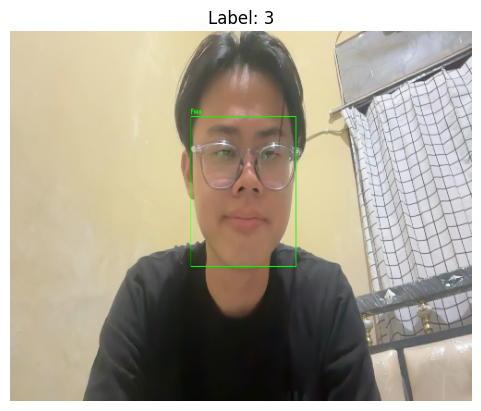

In [ ]:

# for images, labels in dataset.take(1):
#     img = images[0].numpy().astype("uint8")
#     label = labels[0].numpy()
#     plt.imshow(img)
#     plt.title(f"Label: {label}")
#     plt.axis("off")
#     plt.show()
    

In [ ]:

# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.2),
#     layers.RandomZoom(0.2),
#     layers.RandomBrightness(factor=0.2),
#     layers.RandomContrast(0.2),
# ])

In [24]:
def augment_to_1000(dataset, class_names, target_count=1000):
    """
    Augments a TensorFlow dataset to have 'target_count' samples per class efficiently.
    """
    # Step 1: Create dict to store images per class
    class_dict = {name: [] for name in class_names}

    # Step 2: Populate dictionary
    for images, labels in dataset:
        for img, label in zip(images, labels):
            class_name = class_names[int(label)]
            class_dict[class_name].append(img)

    # Step 3: Augment until each class reaches target_count
    for class_name, imgs in class_dict.items():
        print(f"Processing class '{class_name}' ({len(imgs)} base images)...")
        while len(imgs) < target_count:
            # Pick a random image and augment it
            idx = np.random.randint(0, len(imgs))
            aug_img = data_augmentation(tf.expand_dims(imgs[idx], 0))[0]
            imgs.append(aug_img)
        class_dict[class_name] = imgs[:target_count]  # Trim to exact count

        print(f"✅ Class '{class_name}' now has {len(imgs)} samples.")

    # Step 4: Combine all classes back into tensors
    all_images = []
    all_labels = []
    for label_idx, class_name in enumerate(class_names):
        all_images.extend(class_dict[class_name])
        all_labels.extend([label_idx] * len(class_dict[class_name]))

    # Step 5: Create final TensorFlow dataset
    final_ds = tf.data.Dataset.from_tensor_slices((tf.stack(all_images), tf.constant(all_labels)))
    return final_ds.shuffle(1000).batch(32)

In [29]:
augmented_ds = augment_to_1000(dataset, class_names, target_count=1000)

Processing class 'bite_finger' (41 base images)...
✅ Class 'bite_finger' now has 1000 samples.
Processing class 'holding_hand' (42 base images)...
✅ Class 'holding_hand' now has 1000 samples.
Processing class 'open_mouth' (41 base images)...
✅ Class 'open_mouth' now has 1000 samples.
Processing class 'static' (41 base images)...
✅ Class 'static' now has 1000 samples.


2025-10-21 00:37:59.106428: W ./tensorflow/compiler/xla/stream_executor/device_host_allocator.h:52] could not allocate pinned host memory of size: 17179869184
2025-10-21 00:37:59.112779: W ./tensorflow/compiler/xla/stream_executor/device_host_allocator.h:52] could not allocate pinned host memory of size: 17179869184
2025-10-21 00:38:09.146068: W ./tensorflow/compiler/xla/stream_executor/device_host_allocator.h:52] could not allocate pinned host memory of size: 17179869184
2025-10-21 00:38:09.149975: W ./tensorflow/compiler/xla/stream_executor/device_host_allocator.h:52] could not allocate pinned host memory of size: 17179869184
2025-10-21 00:38:09.168645: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (pluggable_device_host_bfc) ran out of memory trying to allocate 8.94GiB (rounded to 9600000000)requested by op Pack
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary

ResourceExhaustedError: {{function_node __wrapped__Pack_N_4000_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[4000,400,500,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator pluggable_device_host_bfc
	 [[{{node Pack}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:Pack] name: stack